In [18]:
!pip install scipy

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.integrate as integrate
import random
from sklearn.linear_model import LinearRegression

def set_random_seed(s):
    random.seed(s)
    np.random.seed(s)


SEED = 47
set_random_seed(SEED)

In [20]:
data_1 = pd.read_csv('/Users/dimach/Desktop/Уник/3_курс/Мат_Стат/PR5/var28/1.txt', header=None, names=['x', 'y'])
data_2 = pd.read_csv('/Users/dimach/Desktop/Уник/3_курс/Мат_Стат/PR5/var28/2.txt', header=None, names=['num', 'cat1', 'cat2', 'y'])
data_3 = pd.read_csv('/Users/dimach/Desktop/Уник/3_курс/Мат_Стат/PR5/var28/3.txt', header=None, names=['x', 'y'])

In [21]:
meann = data_1['y'].mean()
r = ((data_1['x'] * data_1['y']).mean() - data_1['x'].mean() * data_1['y'].mean()) / (data_1['x'].std() * data_1['y'].std())
t_r = np.abs(r) * np.sqrt((data_1.shape[0] - 2) / (1 - r ** 2))
t_r_cv = stats.t.ppf(df=data_1.shape[0] - 2, q=0.975)
print(t_r_cv)
print(np.abs(t_r) < t_r_cv)

1.984467454426692
False


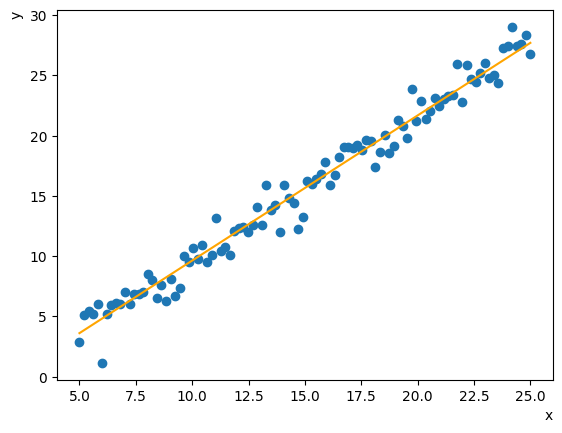

In [22]:
#Принимаем альтернативную гипотезу H1 о том, что коэфф. лин. кор. Пирсона значительно отличен от нуля
z_a = stats.norm.ppf(loc=0, scale=1, q=0.975)
n = data_1.shape[0]

r_l = np.tanh(0.5 * np.log((1 + r) / (1 - r)) - z_a * 1 / (n - 3))
r_u = np.tanh(0.5 * np.log((1 + r) / (1 - r)) + z_a * 1 / (n - 3))
a = r * data_1['y'].std() / data_1['x'].std()
b = data_1['y'].mean() - a * data_1['x'].mean()
plt.scatter(data_1['x'], data_1['y'])
y_pred = a * data_1['x'] + b
plt.plot(data_1['x'], y_pred, color='orange')
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top')

plt.show()

In [23]:
RSS = ((data_1['y'] - y_pred) ** 2).sum()
TSS = ((data_1['y'] - data_1['y'].mean()) ** 2).sum()
F = (RSS / (data_1.shape[0] - 2)) / (TSS / (data_1.shape[0] - 1))
F_cv = stats.f.ppf(dfn=data_1.shape[0] - 2, dfd=data_1.shape[0] - 1, q=0.975)
print(F < F_cv)
# Принимается нулевая гипотеза H0 о том, что модель адекватна
S = np.sqrt(RSS / (data_1.shape[0] - 2))
m_a = S / (data_1['x'].std() * np.sqrt(data_1.shape[0]))
m_b = S * np.sqrt((data_1['x'] ** 2).sum()) / (data_1.shape[0] * data_1['x'].std())
T_a = a / m_a
T_b = b / m_b
print(T_a, T_b)
T_a_cv = T_b_cv = T = stats.t.ppf(df=data_1.shape[0] - 2, q = 0.975)
print(T_a < T_a_cv, T_b < T_b_cv)

True
61.65784262418806 -7.683020977527805
False True


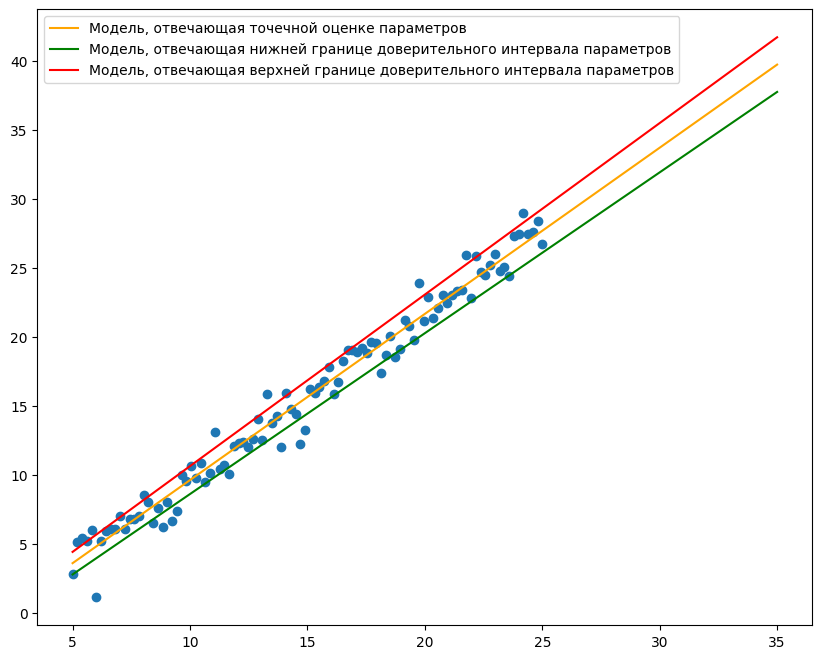

In [24]:
#Для обоих коэффициентов принимается альтернативная гипотеза H1 о том, что коэффициенты отличны от нуля (статистически значимы)
a_l = a - m_a * T_a_cv
a_u = a + m_a * T_a_cv
b_l = b - m_b * T_b_cv
b_u = b + m_b * T_b_cv
plt.figure(figsize=(10, 8))
plt.scatter(data_1['x'], data_1['y'])
x = np.linspace(data_1['x'].min(), 1.5 * data_1['x'].max() - 0.5 * data_1['x'].min(), num=10)
y_pred_ext = a * x + b
y_pred_l = a_l * x + b_l
y_pred_u = a_u * x + b_u
plt.plot(x, y_pred_ext, color='orange', label='Модель, отвечающая точечной оценке параметров')
plt.plot(x, y_pred_l, color='g', label='Модель, отвечающая нижней границе доверительного интервала параметров')
plt.plot(x, y_pred_u, color='r', label='Модель, отвечающая верхней границе доверительного интервала параметров')
plt.legend()
plt.show()

In [25]:
#task3
delta_x = data_1['x'].diff()[1]
x_pred = data_1['x'].iat[-1] + delta_x * 3
E = T * S * np.sqrt(1 + 1 / data_1.shape[0] + (x_pred - data_1['x'].mean()) ** 2 / (data_1['x'].shape[0] * data_1['x'].var()))
print(a * x_pred + b - E, a * x_pred + b + E)

26.10653643294657 30.74678953236195


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

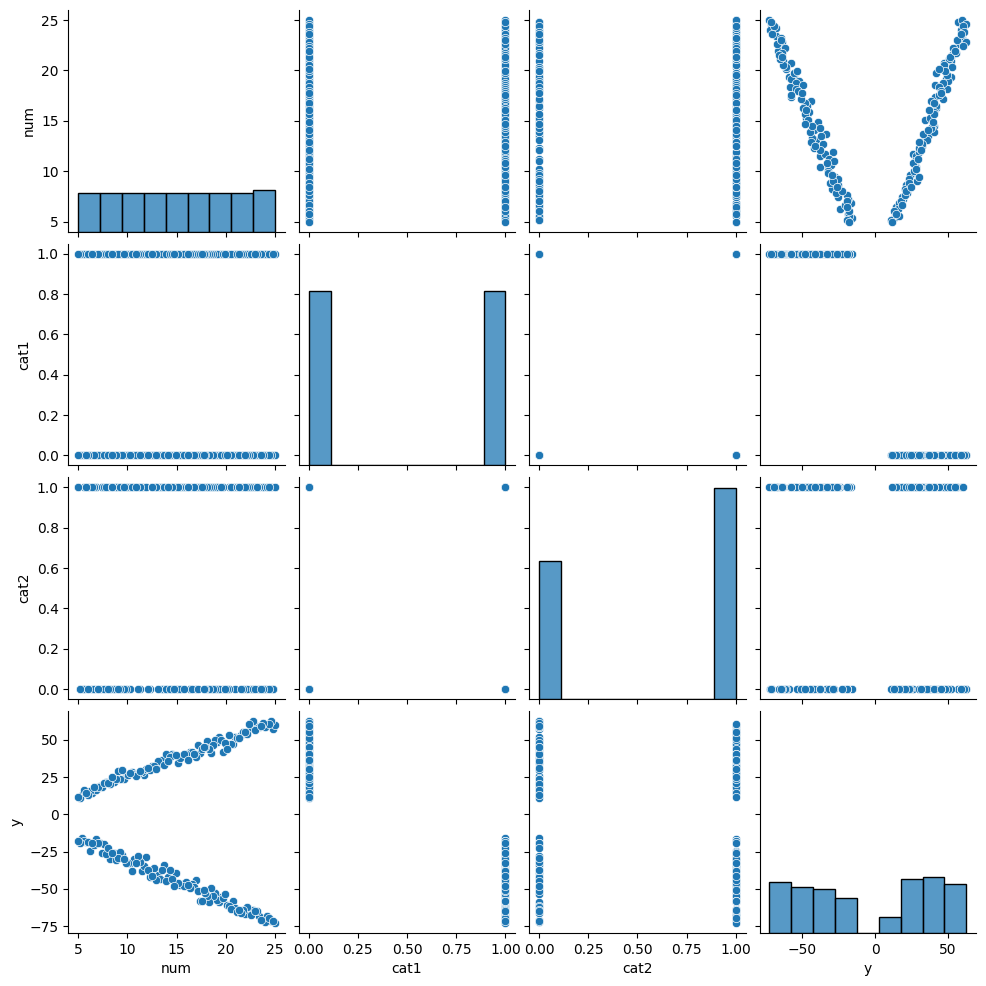

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

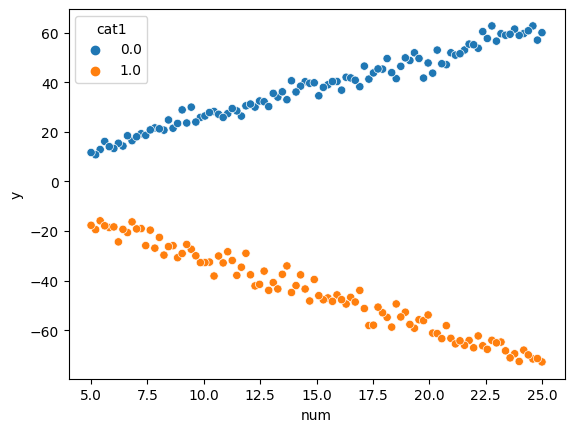

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

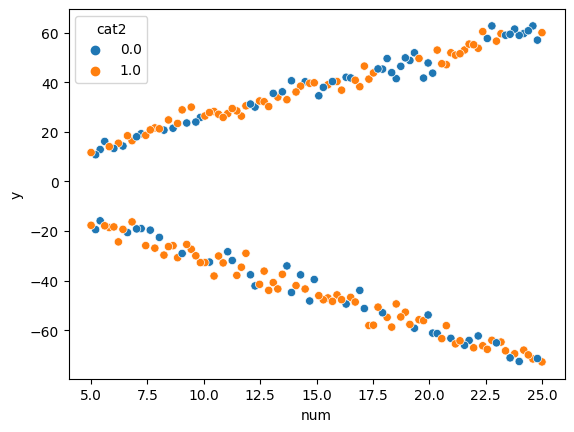

In [26]:
#part2

sns.pairplot(data_2)
plt.show()
sns.scatterplot(data=data_2, x='num', y='y', hue='cat1')
plt.show()
sns.scatterplot(data=data_2, x='num', y='y', hue='cat2')
plt.show()

In [27]:
#cat1
sub_1 = data_2.query("cat1 == 0.0").drop(columns=['cat1'])
sub_2 = data_2.query("cat1 == 1.0").drop(columns=['cat1'])
X_sub_1 = sub_1.iloc[:, :-1]
y_sub_1 = sub_1.iloc[:, -1]

lr_sub_1 = LinearRegression(n_jobs=-1)
lr_sub_1.fit(X_sub_1, y_sub_1)
X_sub_2 = sub_2.iloc[:, :-1]
y_sub_2 = sub_2.iloc[:, -1]

lr_sub_2 = LinearRegression(n_jobs=-1)
lr_sub_2.fit(X_sub_2, y_sub_2)

X_data = data_2.drop(columns=['cat1']).iloc[:, :-1]
y_data = data_2.iloc[:, -1]

In [28]:
lr_data = LinearRegression(n_jobs=-1)
lr_data.fit(X_data, y_data)
RSS = ((y_data - lr_data.predict(X_data)) ** 2).sum()
print(RSS)
RSS1 = ((y_sub_1 - lr_sub_1.predict(X_sub_1)) ** 2).sum()
print(RSS1)
RSS2 = ((y_sub_2 - lr_sub_2.predict(X_sub_2)) ** 2).sum()
print(RSS2)
F_chow = ((RSS - RSS1 - RSS2) / (data_2.shape[1] - 1)) / ((RSS1 + RSS2) / (data_2.shape[0] - 2 * data_2.shape[1] - 2))
F_chow_cv = stats.f.ppf(dfn=data_2.shape[1] - 1, dfd=data_2.shape[0] - 2 * data_2.shape[1] - 2, q=0.95)
print(F_chow > F_chow_cv)

381721.29806133476
609.3666614353081
861.008537074846
True


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

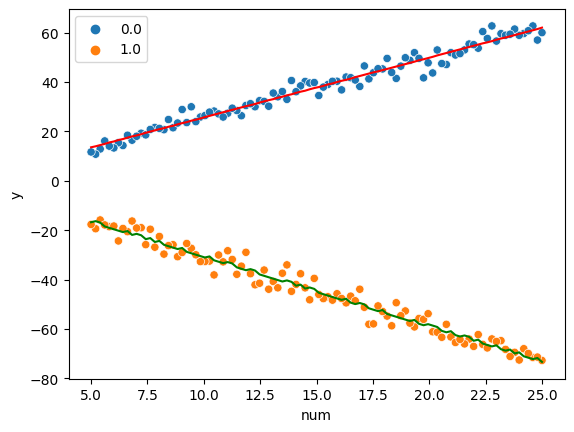

In [29]:
#Принимается нулевая гипотеза H1 о том, что выборки неоднородны, и деление исходной выборки по признаку cat1 целесообразно

sns.scatterplot(data=data_2, x='num', y='y', hue='cat1')
sns.lineplot(x=X_sub_1['num'], y=lr_sub_1.predict(X_sub_1), color='red')
sns.lineplot(x=X_sub_2['num'], y=lr_sub_2.predict(X_sub_2), color='green')
plt.show()


In [30]:

#cat2
sub_1 = data_2.query("cat2 == 0.0").drop(columns='cat2')
sub_2 = data_2.query("cat2 == 1.0").drop(columns='cat2')
X_sub_1 = sub_1.iloc[:, :-1]
y_sub_1 = sub_1.iloc[:, -1]

lr_sub_1 = LinearRegression(n_jobs=-1)
lr_sub_1.fit(X_sub_1, y_sub_1)
X_sub_2 = sub_2.iloc[:, :-1]
y_sub_2 = sub_2.iloc[:, -1]

lr_sub_2 = LinearRegression(n_jobs=-1)
lr_sub_2.fit(X_sub_2, y_sub_2)
X_data = data_2.drop(columns='cat2').iloc[:, :-1]
y_data = data_2.iloc[:, -1]

In [31]:
lr_data = LinearRegression(n_jobs=-1)
lr_data.fit(X_data, y_data)
RSS = ((y_data - lr_data.predict(X_data)) ** 2).sum()
RSS1 = ((y_sub_1 - lr_sub_1.predict(X_sub_1)) ** 2).sum()
RSS2 = ((y_sub_2 - lr_sub_2.predict(X_sub_2)) ** 2).sum()
#print(RSS,RSS1,RSS2)
F_chow = ((RSS - RSS1 - RSS2) / (data_2.shape[1] - 1)) / ((RSS1 + RSS2) / (data_2.shape[0] - 2 * data_2.shape[1] - 2))
F_chow_cv = stats.f.ppf(dfn=data_2.shape[1] - 1, dfd=data_2.shape[0] - 2 * data_2.shape[1] - 2, q=0.95)
print(F_chow > F_chow_cv)

False


Часть 3

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


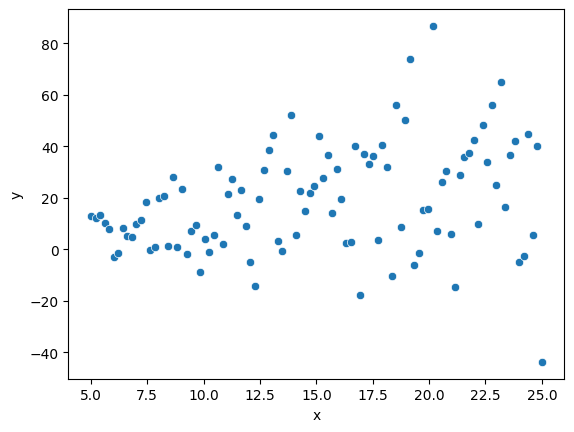

In [32]:
#part3
sns.scatterplot(data=data_3, x='x', y='y')
plt.show()
data_3 = data_3.sort_values(by='x', ascending=False).reset_index(drop=True)
m1 = m2 = int(3 * data_3.shape[0] / 8)

data_3_sub_1 = data_3.iloc[:m1, :].reset_index(drop=True)
data_3_sub_2 = data_3.iloc[data_3.shape[0] - m2:, :].reset_index(drop=True)
data_3_sub_1.shape[0], data_3_sub_2.shape[0]
lr_sub_1 = LinearRegression(n_jobs=-1)
lr_sub_1.fit(data_3_sub_1[['x']], data_3_sub_1['y'])
y_pred_1 = lr_sub_1.predict(data_3_sub_1[['x']])

lr_sub_2 = LinearRegression(n_jobs=-1)
lr_sub_2.fit(data_3_sub_2[['x']], data_3_sub_2['y'])
y_pred_2 = lr_sub_2.predict(data_3_sub_2[['x']])

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

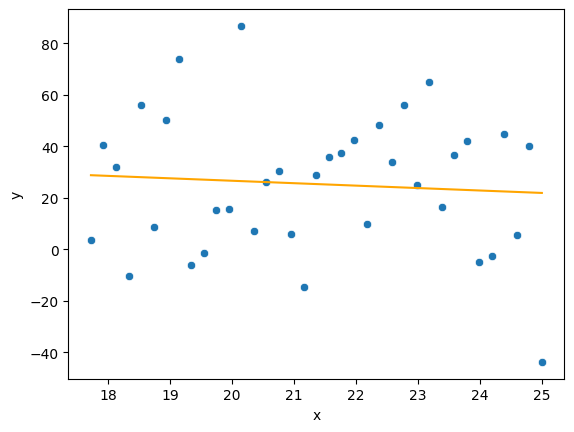

True

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

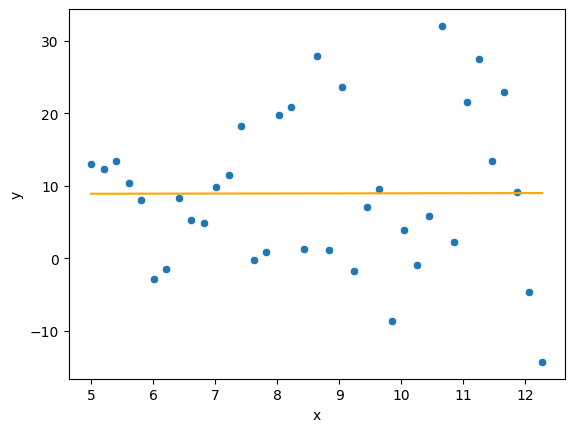

In [33]:
sns.scatterplot(x=data_3_sub_1.iloc[:, 0], y=data_3_sub_1.iloc[:, -1])
sns.lineplot(x=data_3_sub_1.iloc[:, 0], y=y_pred_1, color='orange');
plt.show()
sns.scatterplot(x=data_3_sub_2.iloc[:, 0], y=data_3_sub_2.iloc[:, -1])
sns.lineplot(x=data_3_sub_2.iloc[:, 0], y=y_pred_2, color='orange');
F = (((y_pred_1 - data_3_sub_1.iloc[:, -1]) ** 2).sum() / (m1 - 1)) / (((y_pred_2 - data_3_sub_2.iloc[:, -1]) ** 2).sum() / (m2 - 1))
F_GK_cv = stats.f.ppf(dfn=m1 - 1, dfd=m2 - 1, q=0.95)
print(F > F_GK_cv)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


False


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

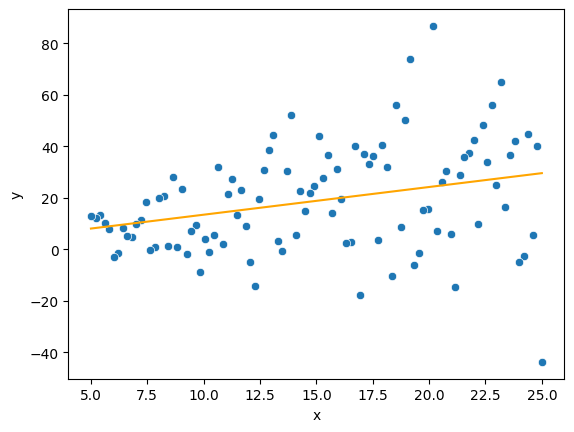

In [34]:
#Нулевая гипотеза H0 отвергается и гетероскедастичность имеет место для заданной линейной зависимости.
lr_data_3 = LinearRegression(n_jobs=-1)
lr_data_3.fit(data_3[['x']], data_3['y'])
y_pred = lr_data_3.predict(data_3[['x']])
sns.scatterplot(x=data_3.iloc[:, 0], y=data_3.iloc[:, -1])
sns.lineplot(x=data_3.iloc[:, 0], y=y_pred, color='orange');
e = data_3.iloc[:, -1] - y_pred
n = data_3.shape[0]
r_s = 1 - 6 * ((e.rank() - data_3['x'].rank()) ** 2).sum() / (n * (n ** 2 - 1))
print(np.abs(r_s * np.sqrt(n - 1)) > stats.norm.ppf(loc=0, scale=1, q=0.975))

In [35]:
#Принимается нулевая гипотеза H0 об отсутствии гетероскедастичности
a = lr_data_3.coef_[0]
b = lr_data_3.intercept_
RSS = (e ** 2).sum()
S = np.sqrt(RSS / (n - 2))
m_a = S / (data_3['x'].std() * np.sqrt(n))
m_b = S * np.sqrt((data_3['x'] ** 2).sum()) / (n * data_3['x'].std())
T_a = a / m_a
T_b = b / m_b
T_a_cv = T_b_cv = T = stats.t.ppf(df=data_3.shape[0] - 2, q = 0.975)
print(T_a < T_a_cv, T_b < T_b_cv)

False True


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

True


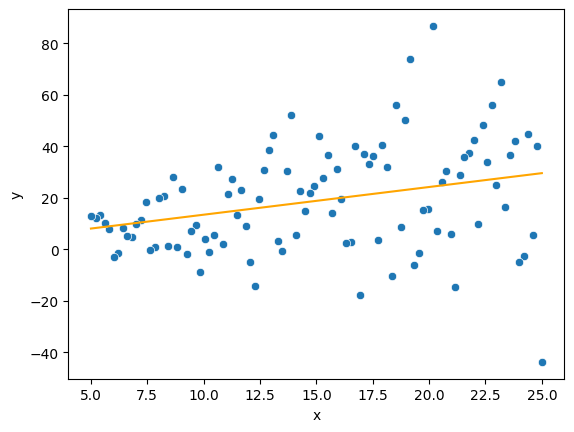

In [36]:
#Для обоих коэффициентов принимается нулевая гипотеза H0 о том, что коэффициенты равны нулю (статистически незначимы)
TSS = ((data_3['y'] - data_3['y'].mean()) ** 2).sum()
F = (RSS / (n - 2)) / (TSS / (n - 1))
F_cv = stats.f.ppf(dfn=n - 2, dfd=n - 1, q=0.975)
print(F < F_cv)
#Принимается нулевая гипотеза H0 о том, что модель адекватна
lr_data_3 = LinearRegression(n_jobs=-1)
lr_data_3.fit(data_3[['x']], data_3['y'])
y_pred = lr_data_3.predict(data_3[['x']])
sns.scatterplot(x=data_3.iloc[:, 0], y=data_3.iloc[:, -1])
sns.lineplot(x=data_3.iloc[:, 0], y=y_pred, color='orange')
plt.show()